In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

import seaborn as sns 


In [2]:
df_orders = pd.read_pickle('cleaned_orders.pkl')
df_reviews = pd.read_pickle('cleaned_reviews.pkl')
df_items = pd.read_pickle('cleaned_items.pkl') 
df_customers = pd.read_pickle('cleaned_customers.pkl')
df_payments = pd.read_pickle('cleaned_payments.pkl')
df_products = pd.read_pickle('cleaned_products.pkl')
df_sellers = pd.read_pickle('cleaned_sellers.pkl')
df_geolocation = pd.read_pickle('cleaned_geolocation.pkl')

print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   delivery_efficiency            96476 non-null  float64       
 9   is_delayed                     99441 non-null  int32         
dtypes: datetime64[ns](5), float64(1), int32(1), object(3)
memory usage: 7.2+ MB
None


In [3]:
#날짜형 변환
df_items['shipping_limit_date']= pd.to_datetime(df_items['shipping_limit_date'])

## 배송 지연 원인분석
### 1. 배송 지연 주문에서 셀러 처리 지연이 얼마나 관측되는가? 
#### 배송 지연 주문 중 '셀러의 발송 기한 초과'가 동반된 그룹은 그렇지 않은 그룹보다 최종 배송 완료일까지의 소요일이 더 길 것이다. 
- 검증 결과: 가설 채택

In [4]:
#배송 지연 데이터 추출
df_late_delivery = df_orders[
(df_orders['delivery_efficiency'] < 0) &
(df_orders['order_status'] == 'delivered')
].copy()
#아이템 데이터 병합
df_late_delivery = df_late_delivery.merge(df_items[['order_id','shipping_limit_date']], on = 'order_id', how='left')

#처리 지연 
late_process = df_late_delivery[
df_late_delivery['order_delivered_carrier_date'].dt.normalize() > df_late_delivery['shipping_limit_date'].dt.normalize() 
].copy()
print(f"배송 지연 중 처리 지연 비율: {(len(late_process)* 100 / len(df_late_delivery)):.2f}")

배송 지연 중 처리 지연 비율: 23.43


In [5]:
df_late_delivery

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_efficiency,is_delayed,shipping_limit_date
0,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,-11.0,1,2017-09-25 04:04:09
1,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,-9.0,1,2018-02-28 02:30:44
2,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21,-7.0,1,2017-11-30 00:21:09
3,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-1.0,1,2018-03-15 15:30:45
4,66e4624ae69e7dc89bd50222b59f581f,684fa6da5134b9e4dab731e00011712d,delivered,2018-03-09 14:50:15,2018-03-09 15:40:39,2018-03-15 00:31:19,2018-04-03 13:28:46,2018-04-02,-1.0,1,2018-03-15 15:30:45
...,...,...,...,...,...,...,...,...,...,...,...
7259,b3112ca67f3afd4e20cf2ee91fc4f804,6f83c71b6c044fb156d697d4130fe9b5,delivered,2018-08-02 22:46:54,2018-08-02 23:04:06,2018-08-15 17:42:00,2018-08-21 00:03:26,2018-08-16,-5.0,1,2018-08-08 23:04:06
7260,0fa1fab1d7c1211c824596ed5e111e3c,7f3bd6c94d2daf7b6462d1a894a775b4,delivered,2018-03-13 21:48:57,2018-03-13 22:40:28,2018-03-14 19:27:23,2018-04-05 19:59:49,2018-04-02,-3.0,1,2018-03-19 22:30:45
7261,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,-21.0,1,2017-10-19 04:28:24
7262,d692ef54145c9cb3322ec2e5508aa3f4,82ddfcf9438b0cd1117b55ac33184df8,delivered,2018-03-21 19:47:18,2018-03-21 20:05:26,2018-03-22 21:11:58,2018-04-11 00:48:31,2018-04-09,-2.0,1,2018-03-27 20:05:26


In [6]:
late_process['late_process_days'] = (late_process['order_delivered_carrier_date'].dt.normalize() - late_process['shipping_limit_date'].dt.normalize()).dt.days

print(late_process['late_process_days'].value_counts().head(10))

1     322
2     163
6     122
5     118
7     117
4     113
3      90
8      84
11     52
13     50
Name: late_process_days, dtype: int64


In [8]:
#주문 -아이템
df_orders_items = df_orders.merge(df_items[['order_id','shipping_limit_date']], on = 'order_id')
df_orders_items_f = df_orders_items[(df_orders_items['order_status'] == 'delivered')].copy()

df_orders_items_f['delivery_days'] = (df_orders_items_f['order_delivered_customer_date']-
df_orders_items_f['order_purchase_timestamp']).dt.days


#셀러 지연 여부
df_orders_items_f['is_seller_delayed'] = np.where(
df_orders_items_f['order_delivered_carrier_date'] > df_orders_items_f['shipping_limit_date'], "seller_delayed", "on-time")

seller_delay_days = df_orders_items_f.groupby('is_seller_delayed')['delivery_days'].mean()
print(seller_delay_days)

is_seller_delayed
on-time           11.283797
seller_delayed    19.047619
Name: delivery_days, dtype: float64


#### 셀러와 고객 주가 다를 때, 동일한 주 내 배송보다 배송 지연율이 높을 것이다. 
- 검증 결과: 가설 채택

In [85]:
#전체 배송 지연율 

print(df_orders['is_delayed'].sum() / df_orders['order_id'].nunique())
print(df_orders['is_delayed'].sum())

0.06571736004263835
6535


In [69]:
# 데이터 병합
orders_customers = pd.merge(df_orders, df_customers, on = 'customer_id', how = 'left')
orders_items = pd.merge(orders_customers, df_items, on = 'order_id', how = 'left')
orders_base = pd.merge(orders_items, df_sellers, on = 'seller_id', how='left')

# 계산식 추가 
orders_base['total_delivery_time'] = (orders_base['order_delivered_customer_date'] - orders_base['order_purchase_timestamp']).dt.days

orders_base['delay_add_days'] = np.where(orders_base['is_delayed'] == 1,
(orders_base['order_delivered_customer_date'].dt.normalize() - orders_base['order_estimated_delivery_date'].dt.normalize()).dt.days
,0 )

orders_base

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_efficiency,is_delayed,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,total_delivery_time,delay_add_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,8.0,0.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,6.0,0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,13.0,0.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,18.0,0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,9.0,0.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,31842.0,belo horizonte,MG,13.0,0.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,10.0,0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,8752.0,mogi das cruzes,SP,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2.0,0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,22.0,0.0
113421,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,6.0,0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290.0,sao paulo,SP,24.0,0.0
113422,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21.0,0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,17.0,0.0
113423,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,21.0,0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,17.0,0.0


In [64]:
#동일 주 여부 판단 변수 
orders_base['is_same_state'] = (orders_base['seller_state']== orders_base['customer_state'])

hypothesis_test = orders_base.groupby('is_same_state').agg(
        order_count = ('order_id','nunique'),
        delay_count = ('is_delayed', 'sum'),
        delay_rate = ('is_delayed', 'mean'),
        avg_delivery_time =('total_delivery_time', 'mean'),
        delay_add_days = ('delay_add_days', 'mean')
).reset_index()

hypothesis_test['delay_rate'] = (hypothesis_test['delay_rate']*100).round(2)
hypothesis_test

,is_same_state,order_count,delay_count,delay_rate,avg_delivery_time,delay_add_days
0,False,64088,5492,7.56,14.584576,0.861261
1,True,35600,1773,4.35,7.461205,0.334037


In [74]:
#동일 주(State)간의 배송도 지연율이 높아, 예측일을 수정하거나, 물류를 조절해야할 주가 존재함. 

state_analysis = orders_base.groupby(['seller_state', 'customer_state']).agg(
        order_count = ('order_id','nunique'),
        delay_count = ('is_delayed', 'sum'),
        avg_delivery_time =('total_delivery_time', 'mean'),
        delay_add_days = ('delay_add_days', 'mean')
).reset_index()
#지연율 만들기
state_analysis['delay_rate'] =(state_analysis['delay_count'] / state_analysis['order_count'] * 100).round(2)
#동일 주 배송 확인 
state_analysis[state_analysis['seller_state'] == state_analysis['customer_state']].sort_values(by= 'delay_rate', ascending=False)

,seller_state,customer_state,order_count,delay_count,avg_delivery_time,delay_add_days,delay_rate
131,MA,MA,14,5,10.066667,0.733333,35.71
80,ES,ES,7,2,7.555556,1.111111,28.57
58,DF,DF,50,5,5.622951,0.360656,10.00
8,BA,BA,70,6,10.662162,1.064103,8.57
379,SC,SC,266,16,7.906040,0.318328,6.02
415,SP,SP,31502,1615,7.461462,0.339965,5.13
302,RJ,RJ,998,49,6.120626,0.450089,4.91
236,PE,PE,23,1,6.458333,0.041667,4.35
351,RS,RS,295,12,7.252336,0.272171,4.07
274,PR,PR,734,21,7.742857,0.105200,2.86


In [76]:
#주문 건수가 50이상인 주 확인 

state_check = state_analysis[state_analysis['order_count'] > 50].sort_values(by='delay_rate', ascending =False)
state_check.head(10)

,seller_state,customer_state,order_count,delay_count,avg_delivery_time,delay_add_days,delay_rate
391,SP,AL,266,62,24.095238,1.989510,23.31
289,RJ,CE,57,13,25.535714,4.881356,22.81
145,MA,SP,125,28,15.876923,1.618321,22.40
399,SP,MA,509,108,21.779599,1.787986,21.22
414,SP,SE,212,43,20.848101,2.481328,20.28
406,SP,PI,343,59,19.889503,2.129630,17.20
160,MG,PA,87,14,27.282609,3.284211,16.09
156,MG,MA,69,11,19.701493,1.083333,15.94
408,SP,RJ,8457,1269,15.653126,1.722543,15.01
261,PR,BA,148,22,21.061350,2.233533,14.86


## 배송 지연 영향 분석

### 배송 지연 경험은 고객의 만족도와 재구매에 부정적인 영향을 미친다 
#### (1) 배송 지연 주문의 평균 리뷰 점수는 정시 도착 주문보다 낮을 것이다
- 결과: 참

In [9]:
#배송 주문 필터링 및 병합
df_delivered_order = df_orders[df_orders['order_status'] == 'delivered'].copy()
df_orders_customers = df_delivered_order.merge(df_customers[['customer_id', 'customer_unique_id']], on ='customer_id', how='left')
df_orders_customers_reviews = df_orders_customers.merge(df_reviews[['order_id', 'review_id', 'review_score']], on = 'order_id', how='left')
#지연 여부
df_orders_customers_reviews['is_delayed'] = np.where(
df_orders_customers_reviews['delivery_efficiency'] < 0, 'delayed', 'on-time'
)
#리뷰 점수 평균 비교
review_comparison = df_orders_customers_reviews.groupby('is_delayed')['review_score'].mean()
print(review_comparison)

is_delayed
delayed    2.271025
on-time    4.289999
Name: review_score, dtype: float64


지연 일수별 리뷰 점수 변화
   delay_days  review_score
0         1.0      3.730255
1         2.0      3.175047
2         3.0      2.683468
3         4.0      2.494279
4         5.0      2.194954
5         6.0      1.808824
6         7.0      1.915789


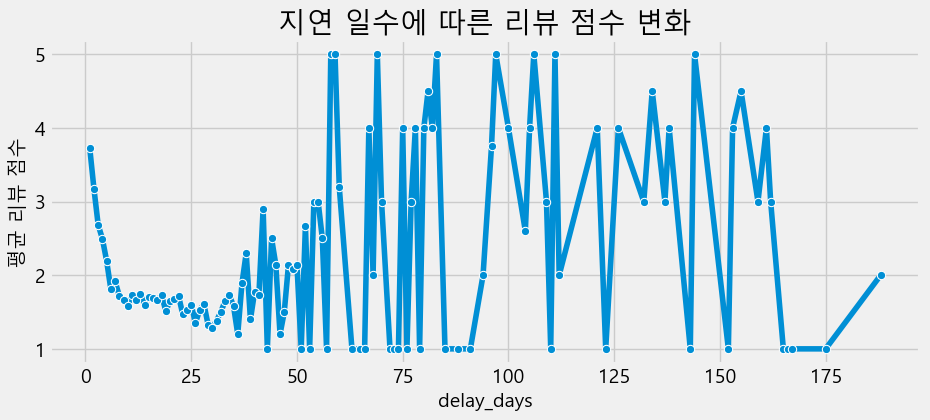

In [10]:
# 지연된 주문(efficiency < 0)만 추출하여 지연 일수를 양수로 변환
df_only_delayed = df_orders_customers_reviews[df_orders_customers_reviews['delivery_efficiency'] < 0].copy()
df_only_delayed['delay_days'] = df_only_delayed['delivery_efficiency'].abs()

# 지연 일수별 평균 점수 계산
delay_trend = df_only_delayed.groupby('delay_days')['review_score'].mean().reset_index()
print("지연 일수별 리뷰 점수 변화" )
print(delay_trend.head(7))

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.lineplot(data=delay_trend, x='delay_days', y='review_score', marker='o')
plt.title('지연 일수에 따른 리뷰 점수 변화')
plt.ylabel('평균 리뷰 점수')
plt.show()

In [11]:
#배송 지연의 리뷰 점수는 일주일 간 하루에 0.37점씩 하락한다
df_7 = delay_trend[delay_trend['delay_days'].between(1, 7)].sort_values('delay_days')

# 전날 대비 변화량
df_7['daily_drop'] = df_7['review_score'].diff()
df_7['daily_drop'].mean()

-0.30241094839163524

#### (2) 배송 지연을 경험한 고객의 재구매율은 정시 도착을 경험한 고객보다 낮을 것이다
- 결과: 참

In [12]:
#첫 구매 주문 기준 재구매율 비교 
df_orders_customers['order_count'] = df_orders_customers.groupby('customer_unique_id')['order_id'].transform('nunique')
df_orders_customers['re_purchase'] = np.where(df_orders_customers['order_count'] > 1, 1, 0)
#첫 구매 데이터 추출
df_first_orders = df_orders_customers.sort_values('order_purchase_timestamp').groupby('customer_unique_id').first().reset_index()
#첫 구매 지연 여부
df_first_orders['first_is_delayed'] = np.where(df_first_orders['delivery_efficiency'] < 0, 'delayed', 'on-time')
#첫 구매 재구매율
first_repurchase_rate = df_first_orders.groupby('first_is_delayed')['re_purchase'].mean()
print("---첫 구매 지연 후 재구매율---")
print(first_repurchase_rate)

---첫 구매 지연 후 재구매율---
first_is_delayed
delayed    0.025330
on-time    0.030344
Name: re_purchase, dtype: float64


#### 3.배송 지연 후 구매한 고객이 정시 고객 대비 재구매간격이 더 길다.
- 결과: 기각

In [13]:
# 고객과 구매 시간별 정렬
df_sorted = df_orders_customers.sort_values(['customer_unique_id', 'order_purchase_timestamp'])

# 고객별 주문 순서
df_sorted['order_rank'] = df_sorted.groupby('customer_unique_id').cumcount() + 1

# 첫 번째와 두 번째 주문 필터링
df_recency = df_sorted[df_sorted['order_rank'].isin([1, 2])].copy()
# 다음 주문 날짜 열 생성
df_recency['next_order_date'] = df_recency.groupby('customer_unique_id')['order_purchase_timestamp'].shift(-1)

# 첫 번째 주문 필터링 후, 구매 간격 계산
df_first = df_recency[df_recency['order_rank'] == 1].copy()
df_first['purchase_interval'] = (df_first['next_order_date'] - df_first['order_purchase_timestamp']).dt.days
df_first['is_delayed'] = np.where(df_first['delivery_efficiency'] < 0, 'delayed', 'on-time')

In [14]:
# 지연 여부별 평균 간격 비교
recency_result = df_first.groupby('is_delayed')['purchase_interval'].mean()

print("------ 그룹별 평균 재구매 간격(일) ------")
print(recency_result)

------ 그룹별 평균 재구매 간격(일) ------
is_delayed
delayed    57.722222
on-time    82.264115
Name: purchase_interval, dtype: float64


In [15]:
# 배송지연 후 재구매를 한 고객 표본이 작다
df_first.dropna(subset =['purchase_interval']).groupby('is_delayed')['purchase_interval'].agg(['mean','count','median'])

,mean,count,median
is_delayed,,,
delayed,57.722222,162,16.5
on-time,82.264115,2639,29.0
